In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('../data/people.csv')
df

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,maried,3


In [29]:
# ruleset

condition_1 = df["Age"].between(0, 150, inclusive='both')
condition_2 = df["Age"] > df['yearsmarried']
condition_3 = df['status'].isin(['widowed', 'single', 'married'])

agegroup_choices = ['child', 'adult', 'elderly']
condition_4 = df['agegroup'] == pd.Series(pd.cut(df['Age'], bins=[0, 18, 65, float('inf')], labels=agegroup_choices, right=False))


In [30]:
violation = ~(condition_1 & condition_2 & condition_3 & condition_4)
violation

print(f'out of {len(df)}, {violation.sum()} values have voilated the condition')

out of 5, 3 values have voilated the condition


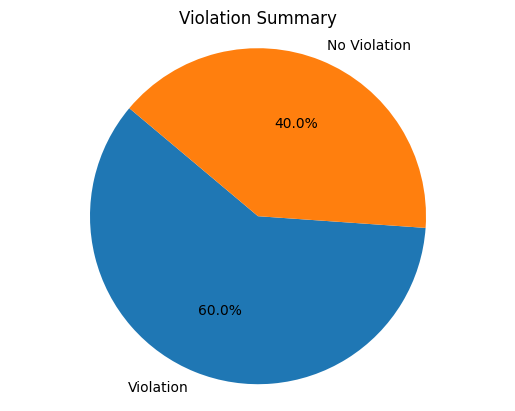

In [31]:
violation_count = violation.value_counts()
labels = ['Violation', 'No Violation']
plt.pie(violation_count, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Violation Summary")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
